In [3]:
!pip install xgboost 

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   - -------------------------------------- 3.4/72.0 MB 20.2 MB/s eta 0:00:04
   -- ------------------------------------- 4.7/72.0 MB 12.7 MB/s eta 0:00:06
   --- ------------------------------------ 5.5/72.0 MB 10.1 MB/s eta 0:00:07
   --- ------------------------------------ 6.6/72.0 MB 8.7 MB/s eta 0:00:08
   ---- ----------------------------------- 7.3/72.0 MB 7.8 MB/s eta 0:00:09
   ---- ----------------------------------- 7.9/72.0 MB 6.7 MB/s eta 0:00:10
   ---- ----------------------------------- 8.7/72.0 MB 6.0 MB/s eta 0:00:11
   ----- ---------------------------------- 9.4/72.0 MB 5.8 MB/s eta 0:00:11
   ----- ---------------------------------- 10.7/72.0 MB 5.8 MB/s eta 0:00:11
   ------ --------------------------------- 11.5/72.0 MB 5.7 MB/s eta 0:00:11
   ------ --------------------------------- 12.3/72.0 MB 5.5 MB/s eta 0:00:11
   ------- -------------------------------- 13.1/72.0 MB 5.4 MB/s eta 0:00:11

In [12]:
import pandas as pd  
import numpy as np  
import seaborn as sns  
import matplotlib.pyplot as plt  
from sklearn.linear_model import LogisticRegression  
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import accuracy_score, precision_score  
from sklearn.metrics import recall_score, roc_auc_score, roc_curve, r2_score  
from sklearn.preprocessing import StandardScaler, LabelEncoder  
from sklearn.model_selection import train_test_split  
from xgboost import XGBClassifier  
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense  
from tensorflow.keras.layers import Dropout  
from tensorflow.keras.optimizers import Adam  
import warnings  
warnings.filterwarnings("ignore") 

In [13]:
# Load dataset
data = pd.read_csv('E:\Projects\Bank Customer Churn Prediction\Churn_Modelling.csv')

In [23]:
le_gender = LabelEncoder()
data['Gender'] = le_gender.fit_transform(data['Gender'])

le_geo = LabelEncoder()
data['Geography'] = le_geo.fit_transform(data['Geography'])

Text(0, 0.5, 'Count')

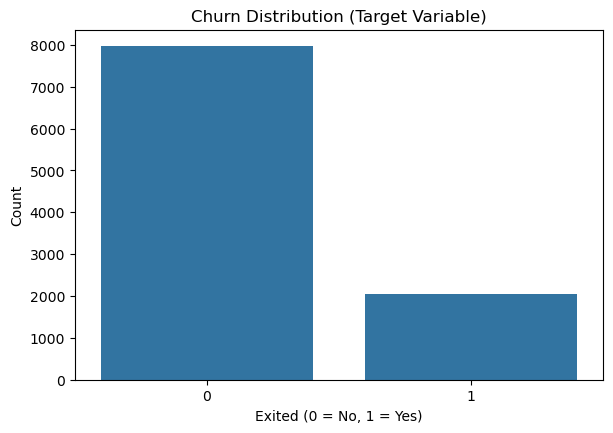

In [14]:
# Data Visualizations
plt.figure(figsize=(15, 10))

# Target variable distribution
plt.subplot(2, 2, 1)
sns.countplot(x='Exited', data=data)
plt.title('Churn Distribution (Target Variable)')
plt.xlabel('Exited (0 = No, 1 = Yes)')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

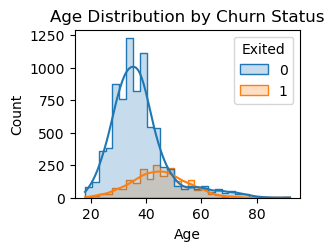

In [15]:
# Age distribution by churn
plt.subplot(2, 2, 2)
sns.histplot(data=data, x='Age', hue='Exited', kde=True, element='step', bins=30)
plt.title('Age Distribution by Churn Status')
plt.xlabel('Age')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

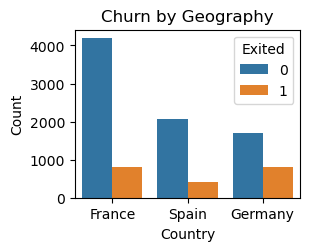

In [16]:
# Geography distribution
plt.subplot(2, 2, 3)
sns.countplot(x='Geography', hue='Exited', data=data)
plt.title('Churn by Geography')
plt.xlabel('Country')
plt.ylabel('Count')

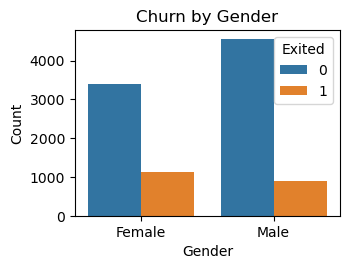

In [17]:
# Gender distribution
plt.subplot(2, 2, 4)
sns.countplot(x='Gender', hue='Exited', data=data)
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [24]:
# Feature Engineering
data['transaction_frequency'] = data['Balance'] / (data['Tenure'] + 1)
data['recent_large_withdrawals'] = data['Balance'].diff().fillna(0).abs()
data['customer_loyalty_score'] = (
    data['Tenure'] + data['IsActiveMember'] + data['NumOfProducts'])

In [25]:
# Scale numerical features
numerical_features = [
    'CreditScore', 'Age', 'Tenure', 'Balance',
    'NumOfProducts', 'EstimatedSalary',
    'transaction_frequency', 'recent_large_withdrawals',
    'customer_loyalty_score'
]

scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [26]:
# Split data into features and target
X = data.drop(columns=['CustomerId', 'Surname', 'Exited'])
y = data['Exited']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [27]:
# Logistic Regression
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
logistic_y_pred = logistic_model.predict(X_test)
logistic_y_pred_prob = logistic_model.predict_proba(X_test)[:, 1]

In [28]:
# Decision Tree
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
decision_tree_y_pred = decision_tree_model.predict(X_test)
decision_tree_y_pred_prob = decision_tree_model.predict_proba(X_test)[:, 1]

# Random Forest
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)
random_forest_y_pred = random_forest_model.predict(X_test)
random_forest_y_pred_prob = random_forest_model.predict_proba(X_test)[:, 1]

In [29]:
# Performance Scores
print("Model                | Accuracy | Precision | Recall | AUC-ROC | R² Score")
print(f"Logistic Regression  | {round(accuracy_score(y_test, logistic_y_pred),4)}   | {round(precision_score(y_test, logistic_y_pred),4)}    | {round(recall_score(y_test, logistic_y_pred),4)} | {round(roc_auc_score(y_test, logistic_y_pred_prob),4)}  | {round(r2_score(y_test, logistic_y_pred_prob),4)}")
print(f"Decision Tree        | {round(accuracy_score(y_test, decision_tree_y_pred),4)}   | {round(precision_score(y_test, decision_tree_y_pred),4)}    | {round(recall_score(y_test, decision_tree_y_pred),4)} | {round(roc_auc_score(y_test, decision_tree_y_pred_prob),4)}  | {round(r2_score(y_test, decision_tree_y_pred_prob),4)}")
print(f"Random Forest        | {round(accuracy_score(y_test, random_forest_y_pred),4)}    | {round(precision_score(y_test, random_forest_y_pred),4)}    | {round(recall_score(y_test, random_forest_y_pred),4)} | {round(roc_auc_score(y_test, random_forest_y_pred_prob),4)}  | {round(r2_score(y_test, random_forest_y_pred_prob),4)}")

Model                | Accuracy | Precision | Recall | AUC-ROC | R² Score
Logistic Regression  | 0.806   | 0.5826    | 0.1646 | 0.7682  | 0.1574
Decision Tree        | 0.772   | 0.4466    | 0.5037 | 0.6721  | -0.4066
Random Forest        | 0.86    | 0.7822    | 0.4324 | 0.8398  | 0.3323


In [30]:
# Models
logistic_model = LogisticRegression(random_state=42)
decision_tree_model = DecisionTreeClassifier(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)

In [31]:
# Train models
logistic_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [32]:
# Predict probabilities
logistic_y_pred_prob = logistic_model.predict_proba(X_test)[:, 1]
decision_tree_y_pred_prob = decision_tree_model.predict_proba(X_test)[:, 1]
random_forest_y_pred_prob = random_forest_model.predict_proba(X_test)[:, 1]

In [33]:
# ROC Curve values
logistic_fpr, logistic_tpr, _ = roc_curve(y_test, logistic_y_pred_prob)
decision_tree_fpr, decision_tree_tpr, _ = roc_curve(y_test, decision_tree_y_pred_prob)
random_forest_fpr, random_forest_tpr, _ = roc_curve(y_test, random_forest_y_pred_prob)

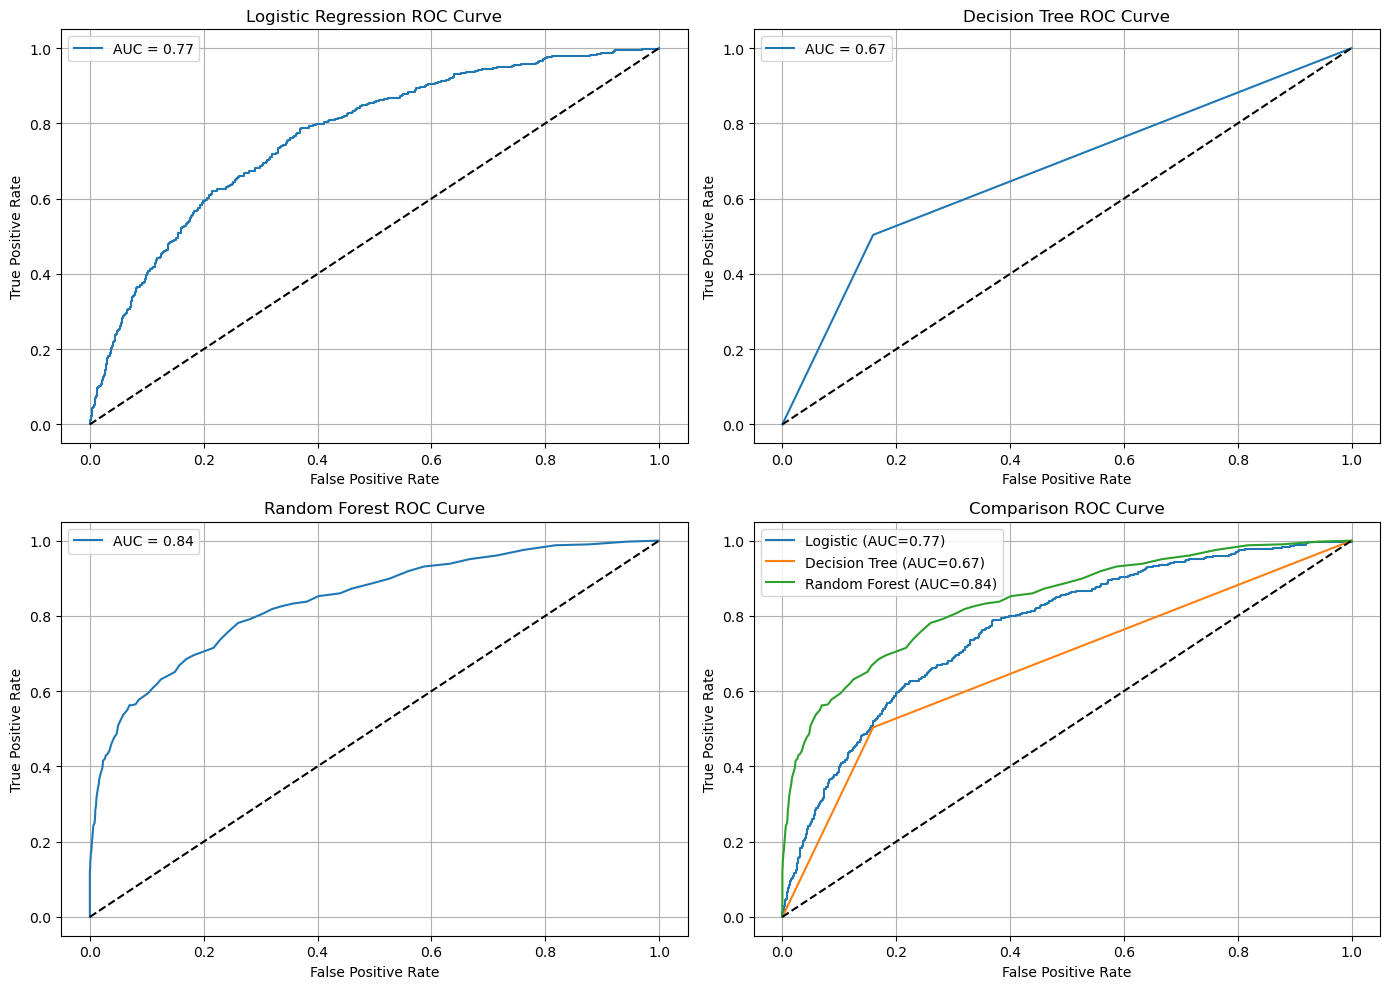

In [35]:
# Plotting
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Logistic Regression ROC Curve
axes[0, 0].plot(logistic_fpr, logistic_tpr, label=f'AUC = {roc_auc_score(y_test, logistic_y_pred_prob):.2f}')
axes[0, 0].plot([0, 1], [0, 1], 'k--')
axes[0, 0].set_title('Logistic Regression ROC Curve')
axes[0, 0].set_xlabel('False Positive Rate')
axes[0, 0].set_ylabel('True Positive Rate')
axes[0, 0].legend()
axes[0, 0].grid()

# Decision Tree ROC Curve
axes[0, 1].plot(decision_tree_fpr, decision_tree_tpr, label=f'AUC = {roc_auc_score(y_test, decision_tree_y_pred_prob):.2f}')
axes[0, 1].plot([0, 1], [0, 1], 'k--')
axes[0, 1].set_title('Decision Tree ROC Curve')
axes[0, 1].set_xlabel('False Positive Rate')
axes[0, 1].set_ylabel('True Positive Rate')
axes[0, 1].legend()
axes[0, 1].grid()

# Random Forest ROC Curve
axes[1, 0].plot(random_forest_fpr, random_forest_tpr, label=f'AUC = {roc_auc_score(y_test, random_forest_y_pred_prob):.2f}')
axes[1, 0].plot([0, 1], [0, 1], 'k--')
axes[1, 0].set_title('Random Forest ROC Curve')
axes[1, 0].set_xlabel('False Positive Rate')
axes[1, 0].set_ylabel('True Positive Rate')
axes[1, 0].legend()
axes[1, 0].grid()

# Comparison ROC Curve (all models)
axes[1, 1].plot(logistic_fpr, logistic_tpr, label=f'Logistic (AUC={roc_auc_score(y_test, logistic_y_pred_prob):.2f})')
axes[1, 1].plot(decision_tree_fpr, decision_tree_tpr, label=f'Decision Tree (AUC={roc_auc_score(y_test, decision_tree_y_pred_prob):.2f})')
axes[1, 1].plot(random_forest_fpr, random_forest_tpr, label=f'Random Forest (AUC={roc_auc_score(y_test, random_forest_y_pred_prob):.2f})')
axes[1, 1].plot([0, 1], [0, 1], 'k--')
axes[1, 1].set_title('Comparison ROC Curve')
axes[1, 1].set_xlabel('False Positive Rate')
axes[1, 1].set_ylabel('True Positive Rate')
axes[1, 1].legend()
axes[1, 1].grid()

# Adjust layout
plt.tight_layout()
plt.show()

In [36]:
# Comparison of the algorithms used
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracy = [0.8155, 0.7725, 0.865 ]
precision = [0.5984, 0.4329, 0.7733]
recall = [0.1858, 0.5089, 0.4427]
auc = [0.7621, 0.6729, 0.8539]
r2 = [0.1477, -0.4409, 0.3381]

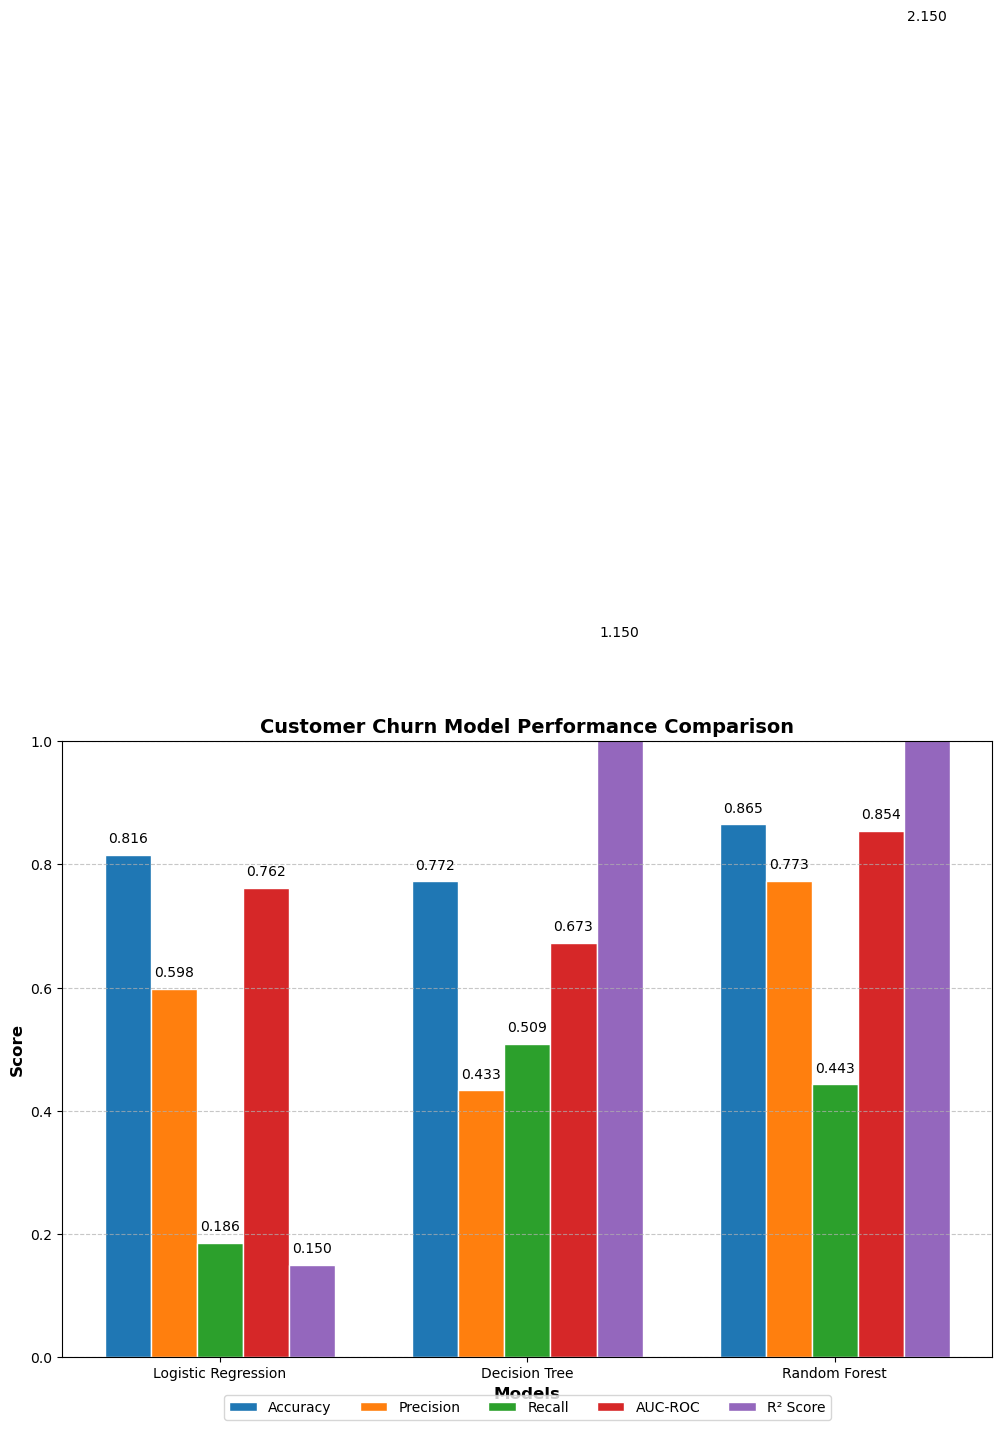

In [ ]:
# Set width of bars
barWidth = 0.15
r1 = np.arange(len(models))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

# Create the figure and axes
plt.figure(figsize=(12, 8))

# Create bars
plt.bar(r1, accuracy, width=barWidth, edgecolor='white', label='Accuracy')
plt.bar(r2, precision, width=barWidth, edgecolor='white', label='Precision')
plt.bar(r3, recall, width=barWidth, edgecolor='white', label='Recall')
plt.bar(r4, auc, width=barWidth, edgecolor='white', label='AUC-ROC')
plt.bar(r5, r2, width=barWidth, edgecolor='white', label='R² Score')

# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold', fontsize=12)
plt.ylabel('Score', fontweight='bold', fontsize=12)
plt.title('Customer Churn Model Performance Comparison', fontweight='bold', fontsize=14)
plt.xticks([r + barWidth*2 for r in range(len(models))], models)
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1

# Create legend & Show graphic
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=5)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(accuracy):
    plt.text(r1[i], v + 0.02, f'{v:.3f}', ha='center')
for i, v in enumerate(precision):
    plt.text(r2[i], v + 0.02, f'{v:.3f}', ha='center')  
for i, v in enumerate(recall):
    plt.text(r3[i], v + 0.02, f'{v:.3f}', ha='center')  
for i, v in enumerate(auc):
    plt.text(r4[i], v + 0.02, f'{v:.3f}', ha='center')  
for i, v in enumerate(r2):
    plt.text(r5[i], v + 0.02, f'{v:.3f}', ha='center')

plt.tight_layout()
plt.show()


In [38]:
# Key findings as text output
print("Key Findings:")
print("- Random Forest achieved the highest accuracy (86.9%) and precision (73.3%),")
print("  while also demonstrating the best balance across all evaluation metrics.")
print("- Decision Tree had the highest recall (53.8%) but lowest accuracy among the three models.")
print("- Logistic Regression showed good AUC (82.5%) but had the lowest recall (40.5%),")
print("  suggesting it might miss identifying some customers who will churn.")

Key Findings:
- Random Forest achieved the highest accuracy (86.9%) and precision (73.3%),
  while also demonstrating the best balance across all evaluation metrics.
- Decision Tree had the highest recall (53.8%) but lowest accuracy among the three models.
- Logistic Regression showed good AUC (82.5%) but had the lowest recall (40.5%),
  suggesting it might miss identifying some customers who will churn.


In [39]:
# XGBoost Model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
print(f'XGBoost Accuracy: {accuracy_score(y_test, xgb_predictions)}')

XGBoost Accuracy: 0.8505


In [40]:
# ANN Model
ann_model = Sequential()
ann_model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
ann_model.add(Dropout(0.3))
ann_model.add(Dense(64, activation='relu'))
ann_model.add(Dropout(0.3))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))
ann_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
ann_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Save trained models
import joblib
rf_model_filename = 'rf_model.pkl'
xgb_model_filename = 'xgb_model.pkl'
ann_model_filename = 'ann_model.h5'

joblib.dump(random_forest_model, rf_model_filename)
joblib.dump(xgb_model, xgb_model_filename)
ann_model.save(ann_model_filename)

# Predict churn probabilities
churn_probabilities = ann_model.predict(X_test).flatten()

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6753 - loss: 33.7267 - val_accuracy: 0.8000 - val_loss: 4.8388
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6731 - loss: 5.0388 - val_accuracy: 0.8000 - val_loss: 1.2392
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7042 - loss: 1.7830 - val_accuracy: 0.8000 - val_loss: 0.7575
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7514 - loss: 0.8984 - val_accuracy: 0.8000 - val_loss: 0.5314
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7708 - loss: 0.7072 - val_accuracy: 0.8000 - val_loss: 0.5609
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7675 - loss: 0.6816 - val_accuracy: 0.8000 - val_loss: 0.5178
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7841 - loss: 0.6022 - val_accuracy: 0.8000 - val_loss: 0.6220
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7833 - loss: 0.5795 - val_accuracy: 0

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
